Boston Housing Dataset
===

Load the dataset

In [1]:
%matplotlib inline
import sklearn
import mglearn

from sklearn.datasets import load_boston
boston = load_boston()
X, y = extended_boston = mglearn.datasets.load_extended_boston()

# boston housing dataset
# {
#   feature_names: ['CRIM', 'ZN', ...],
#   data: [
#     [6.32000000e-03, 1.80000000e+01, ...],
#     ...
#   ],
#   target: [24.0, 21.6, ...]
# }

Linear Regression with multiple features

In [3]:
%matplotlib inline
import sklearn
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))) # overfitting

Training set score: 0.94
Test set score: 0.79


Ridge regression
---

In [7]:
%matplotlib inline
import sklearn
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.81


Adjusting alpha in Ridge regressions

In [9]:
%matplotlib inline
import sklearn
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.82


Plot coefficient magnitude vs coefficient index

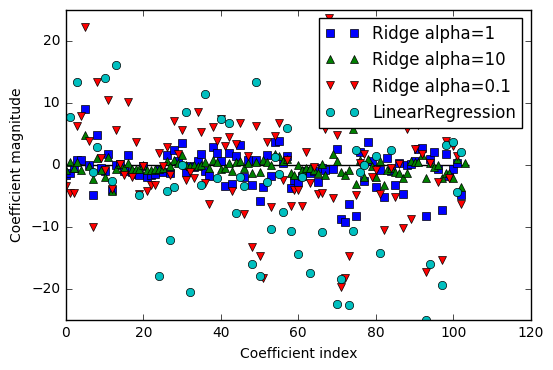

In [13]:
%matplotlib inline
import sklearn
import mglearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend() # larger alphas constrain the magnitude

Plot a learning curve (model performance vs dataset size)

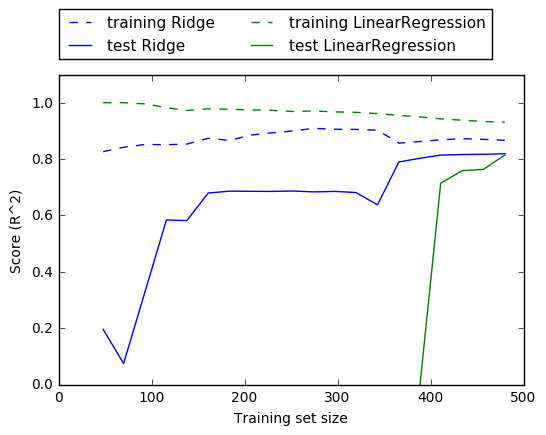

In [14]:
import mglearn

mglearn.plots.plot_ridge_n_samples()

Use a Lasso as an alternative to Ridge regressions
---

In [18]:
import numpy as np

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {} / 105".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.27
Test set score: 0.26
Number of features used: 3 / 105


Tweak alpha and maximum iterations to tune performance

In [19]:
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {} / 105".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.89
Test set score: 0.80
Number of features used: 34 / 105


Caution: overfit occurs if alpha is set too low

In [20]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {} / 105".format(np.sum(lasso0001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.81
Number of features used: 94 / 105


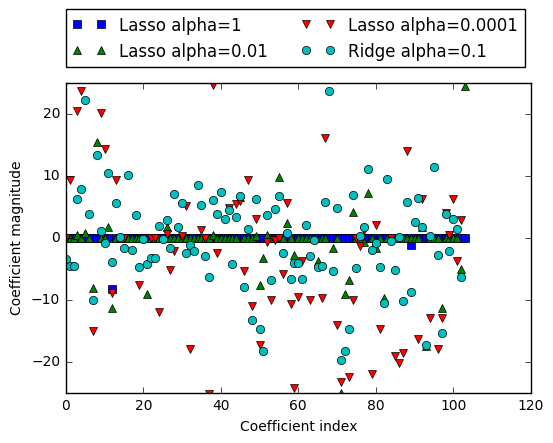

In [21]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05)) # larger alphas constrain the magnitude